# <font color="aqua">Decision tree</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../0.dataset/Social_Network_Ads.csv"
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df["Purchased"].unique()

array([0, 1], dtype=int64)

In [6]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

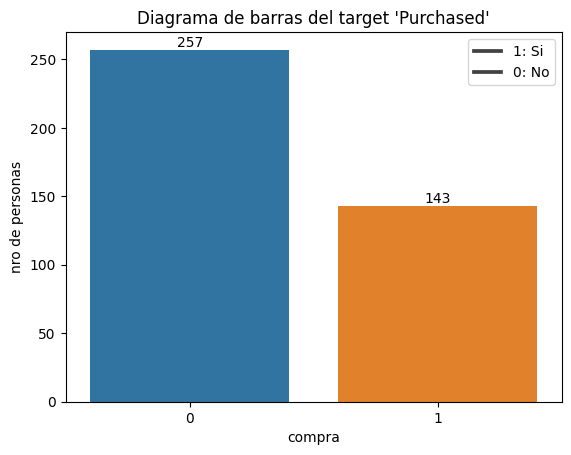

In [7]:
# obtener la lista de valores a representar graficamente
Values = list(df["Purchased"].value_counts())
unique_values = list(df["Purchased"].unique())

# definir tamaño del marco 
#plt.figure(figsize=(10,8))

# Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=unique_values, y=Values, )

# Ajustar las etiquetas del eje x y el título
plt.xlabel("compra")
plt.ylabel("nro de personas")
plt.title("Diagrama de barras del target 'Purchased'")
plt.legend(["1: Si ","0: No"], loc="upper right")

# mostrar valores sobre las barras
for i in ax.containers:
    ax.bar_label(i, label_type="edge")

# Mostrar el gráfico
plt.show()

In [5]:
# variables dummies
new_df = df.copy()

# convertir de categorico a numerico
df_dummies = pd.get_dummies(df['Gender'], drop_first = True) 

# Concatenamos las variables binarias al DataFrame
new_df = pd.concat([new_df, df_dummies], axis = 1)

# Eliminamos la vairable original race
new_df.drop(columns=['Gender'], axis=1, inplace=True)

# renombrar columna
new_df.rename(columns = {'Male': 'Gender_Male'}, inplace=True)

new_df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1


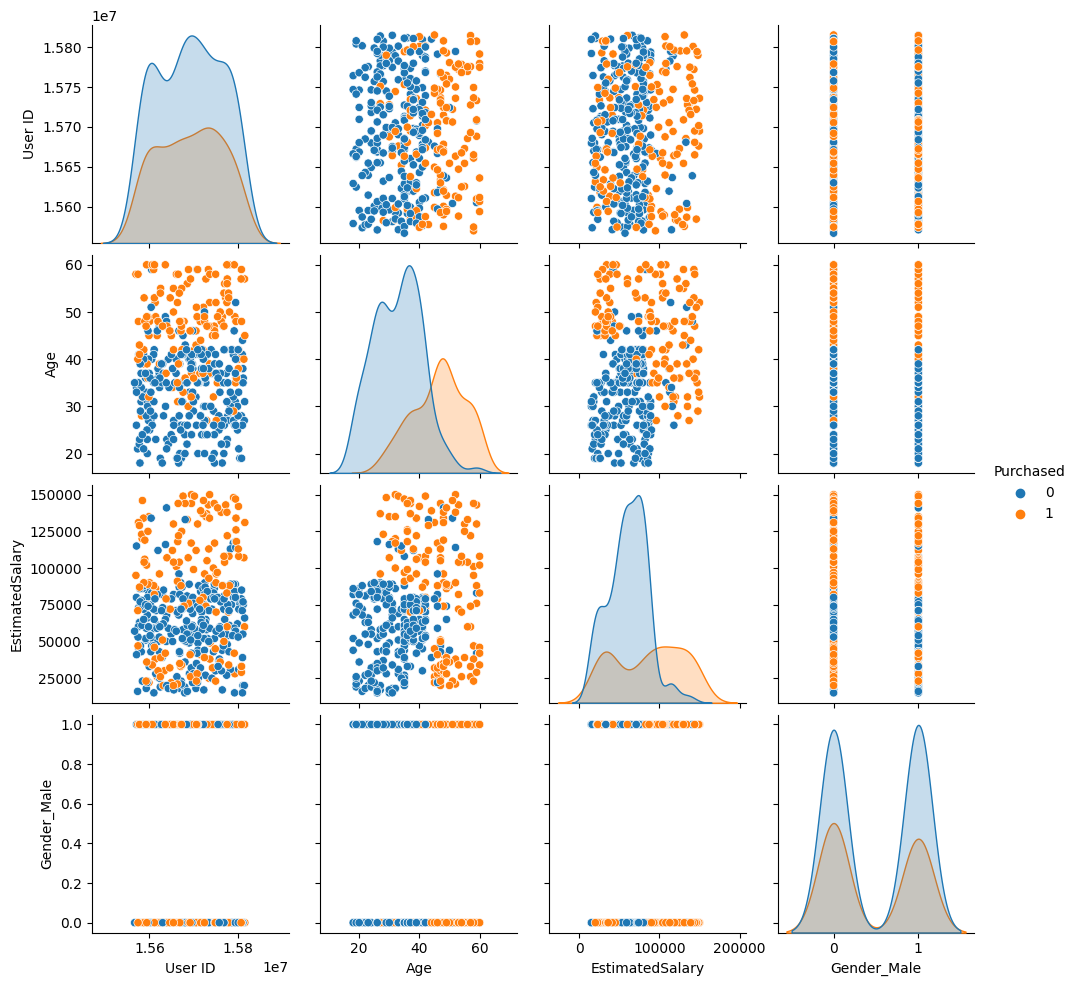

In [9]:
# matriz de scatterplots(gráficos de dispersión)
nro_columns = 5
sns.pairplot(data=new_df[new_df.columns[0:nro_columns+1]],
             hue="Purchased"
             )
plt.show()

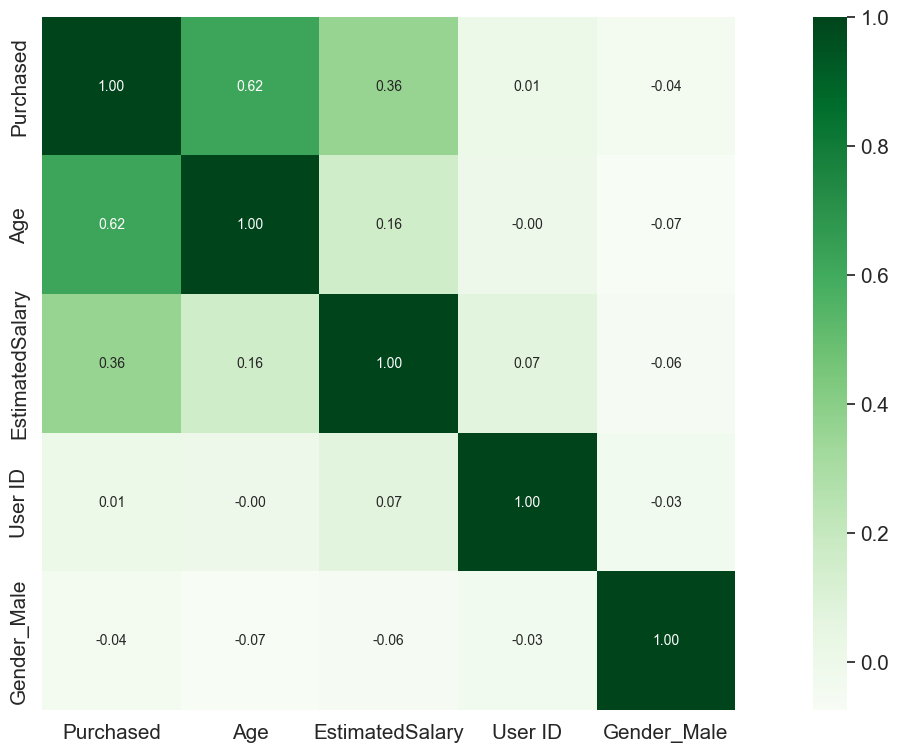

In [6]:
# OBSERVAR EL GRADO DE CORRELACION ENTRE LAS VARIABLES
target = "Purchased"
len_columns = 6

corr = new_df.corr()
columnas = corr.nlargest(len_columns , target)[target].index

plt.figure(figsize=(20, 9))
cm = np.corrcoef(new_df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

In [7]:
# eliminar columna con valor de correlacion prox a cero
""" new_df_2 = new_df.drop(["User ID","Gender_Male"],axis=1)
new_df_2.head() """
new_df = new_df.drop(["User ID"],axis=1)

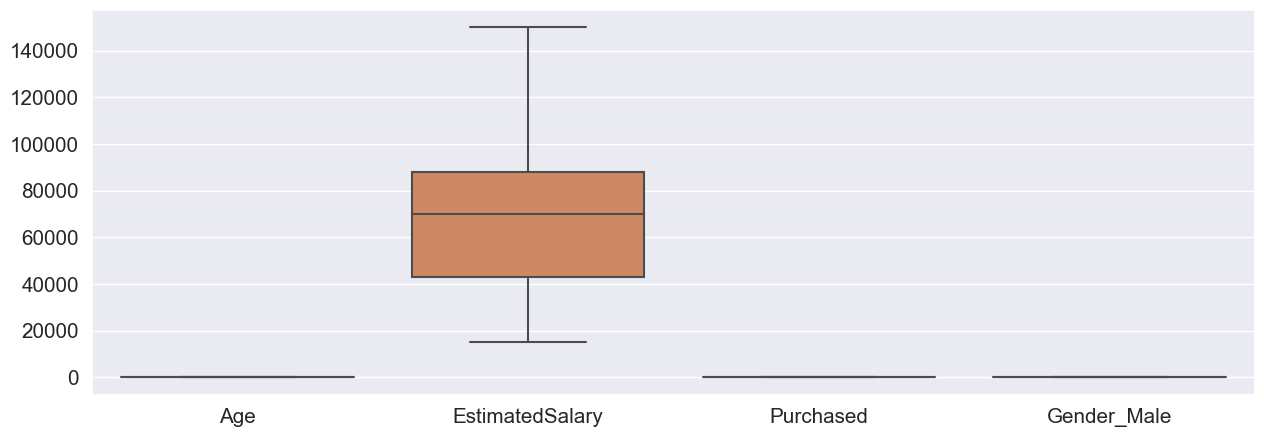

In [8]:
# BUSQUEDA DE VALORES ATIPICOS (OUTLIERS) mediante gráficas
# boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = new_df)
plt.show()

In [52]:
# separar data y variale objetivo
X = new_df.drop("Purchased", axis=1)
y = new_df["Purchased"]

In [53]:
# Escalado o normalizacion de los datos

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_x.fit(X)

# =========== TRANSFORMANDO =========== 
X = scaler_x.transform(X)

In [54]:
# =========== SEPARACION DE DATOS =========== 
from sklearn.model_selection import train_test_split

# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [45]:
# =========== MODELADO =========== 
from sklearn.tree import DecisionTreeClassifier
# crear el modelo
model_classifier = DecisionTreeClassifier(random_state=0)
# entrenar el modelo
model_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
# ============= PREDECIR =============
y_pred = model_classifier.predict(X_test)

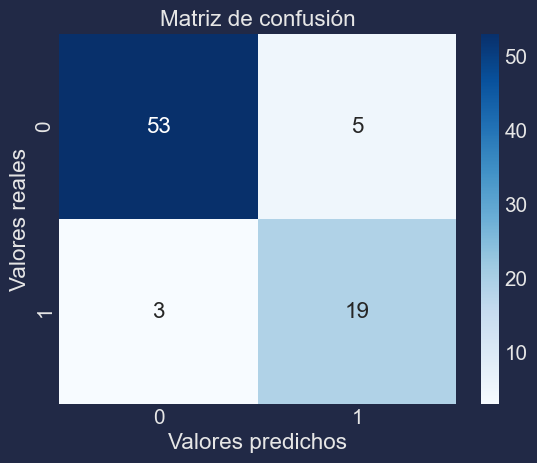

In [56]:
# ============== MATRIZ DE CONFUSION =================================
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajustar las etiquetas del eje x y el título
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")

# Mostrar el gráfico
plt.show()


In [57]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



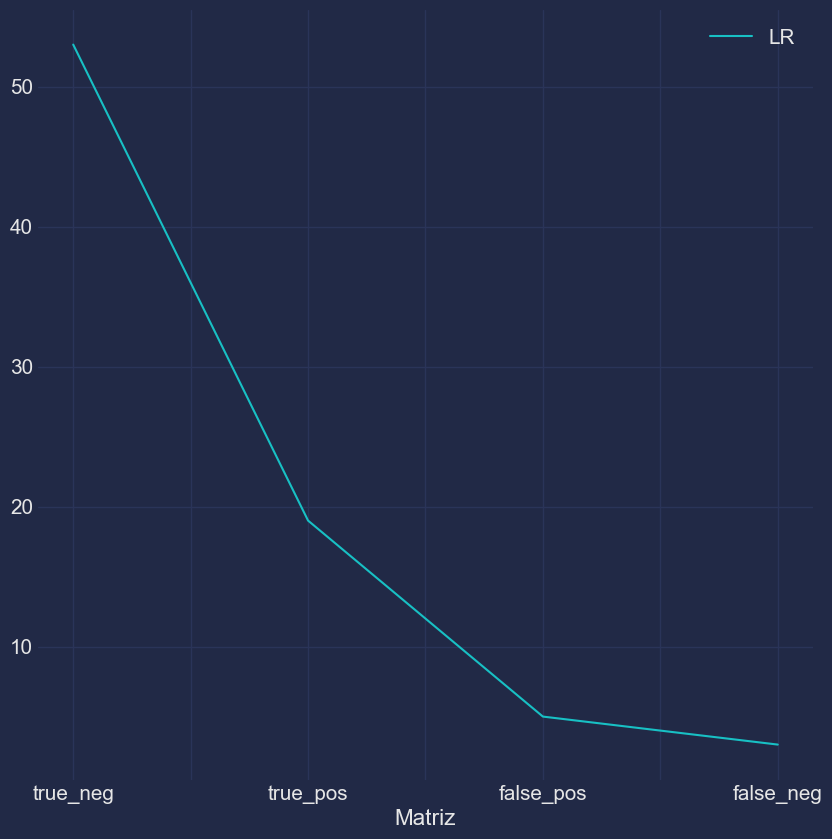

In [58]:
# ================== VISUALIZACION =================================
columns = ["true_neg","true_pos","false_pos","false_neg"]
diccionario={"Matriz":columns}
# agregar elementos al dic
values_pred = [cm[0][0], cm[1][1],cm[0][1], cm[1][0]]
diccionario[f"LR"]=values_pred

# graficar
df_values = pd.DataFrame(diccionario)
fig, ax = plt.subplots(1, figsize=(10,10))

df_values.plot(x = 'Matriz', y = 'LR', ax = ax)

plt.show()

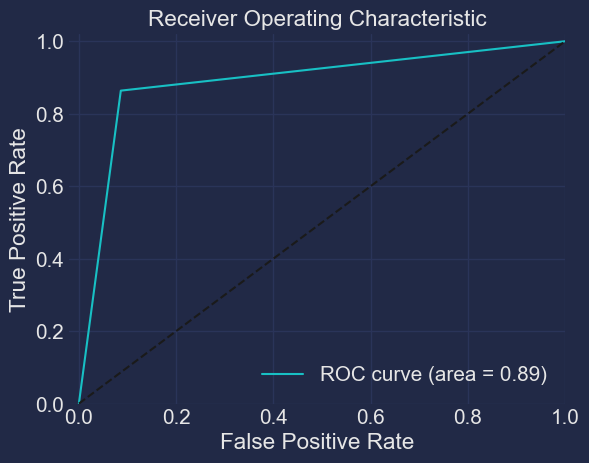

In [59]:
# ========= CURVA ROC =================
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de predicción para cada clase
y_pred_prob = model_classifier.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


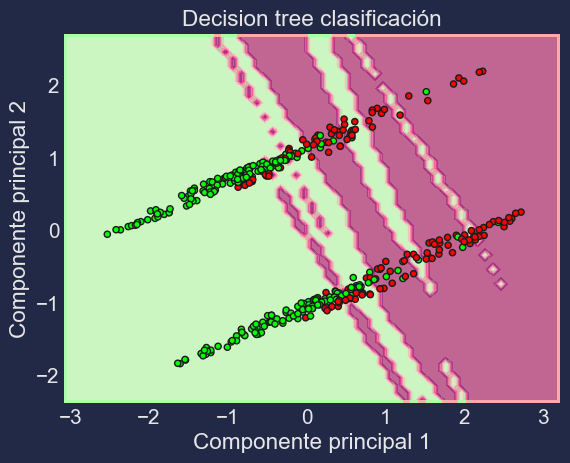

In [60]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reducir dimensionalidad de los datos utilizando PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Definir límites del gráfico
x_min, x_max = X_reduced[:, 0].min() - 0.5, X_reduced[:, 0].max() + 0.5
y_min, y_max = X_reduced[:, 1].min() - 0.5, X_reduced[:, 1].max() + 0.5

# Create color maps
cmap_light = ListedColormap([ '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap([ '#00FF00', '#FF0000'])

# Generar malla de puntos para graficar áreas de decisión
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


# Graficar datos y áreas de decisión
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, edgecolor='k',cmap=cmap_bold)
plt.title('Decision tree clasificación')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

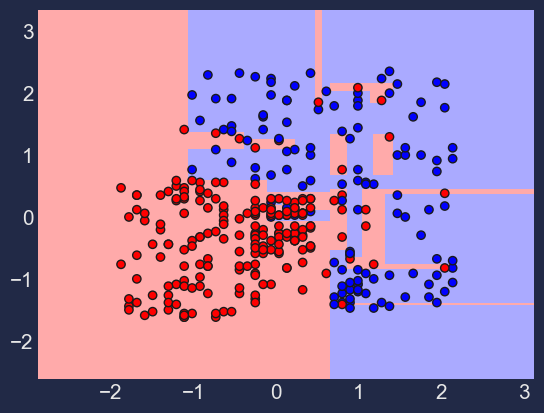

In [61]:
# import some data to play with
X = X_train[:,:2]  # we only take the first two features.
y = y_train
 
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
 
plt.show()

In [62]:
# =========== METRICAS DE EVALUACION ========= 

# Calcular la matriz de confusión
y_pred = clf.predict(X_test[:,:2])

cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [ 3, 19]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



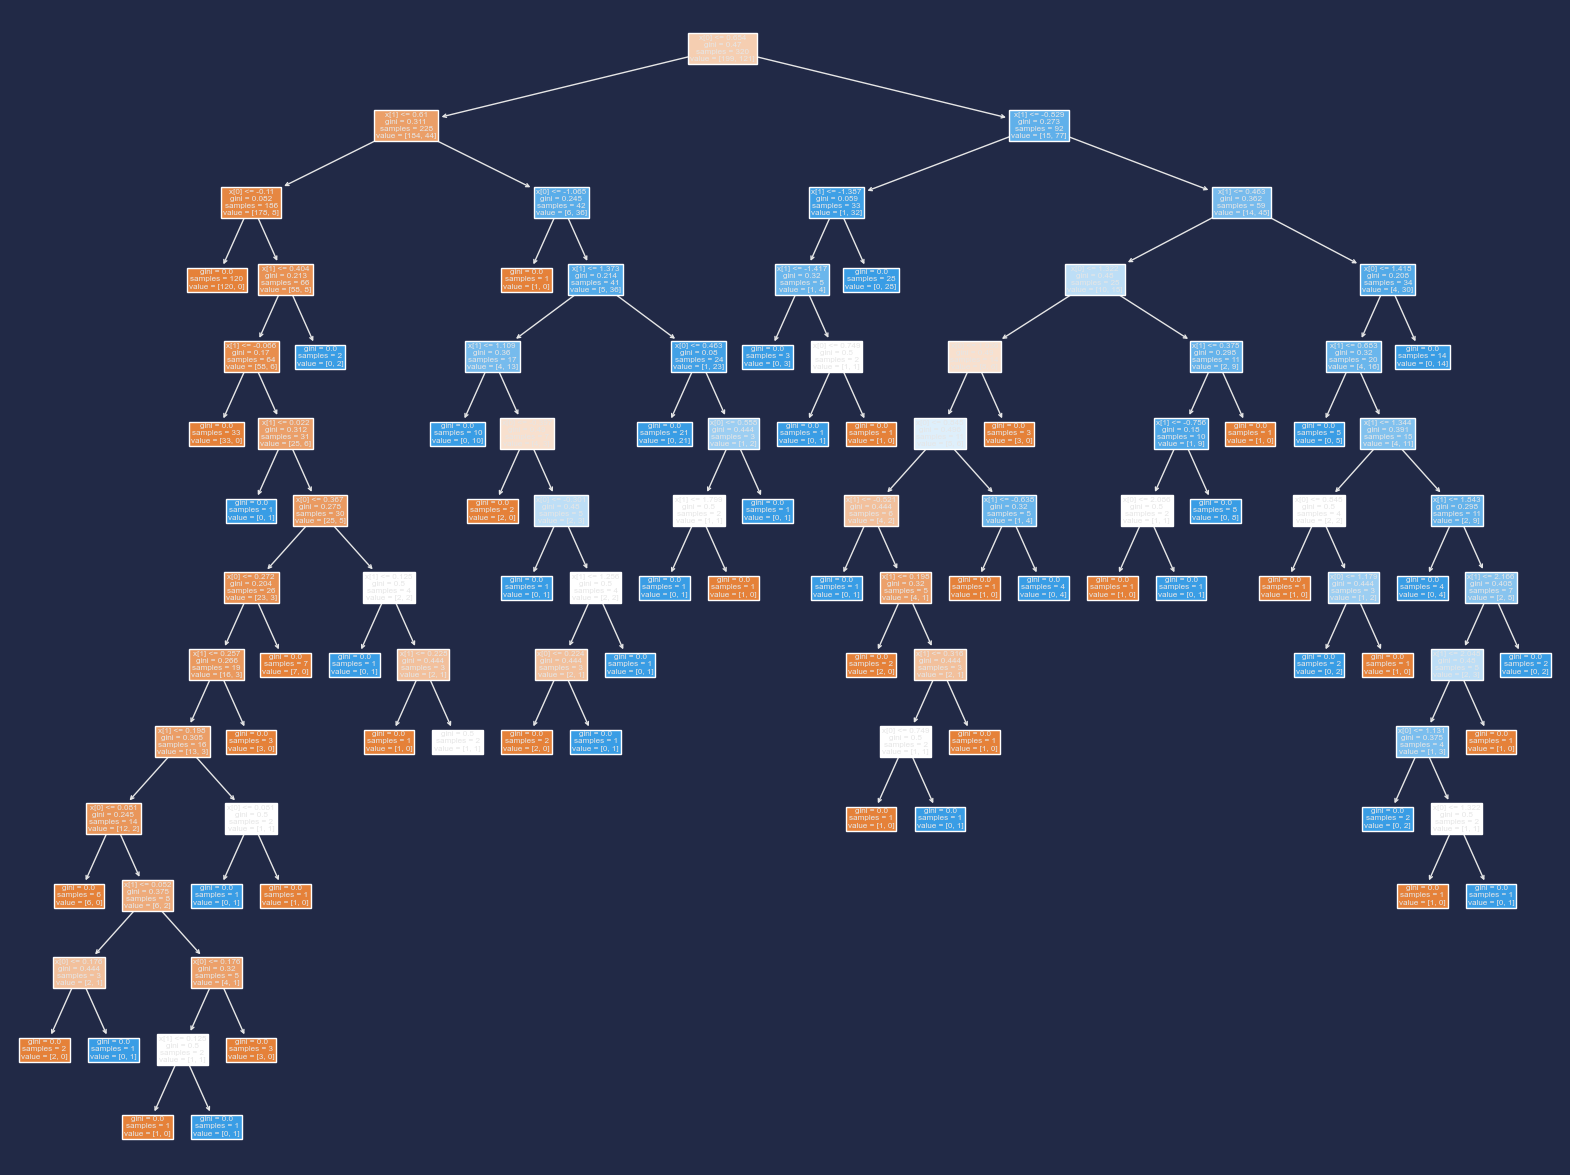

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

def evaluar_modelo(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, recall, f1

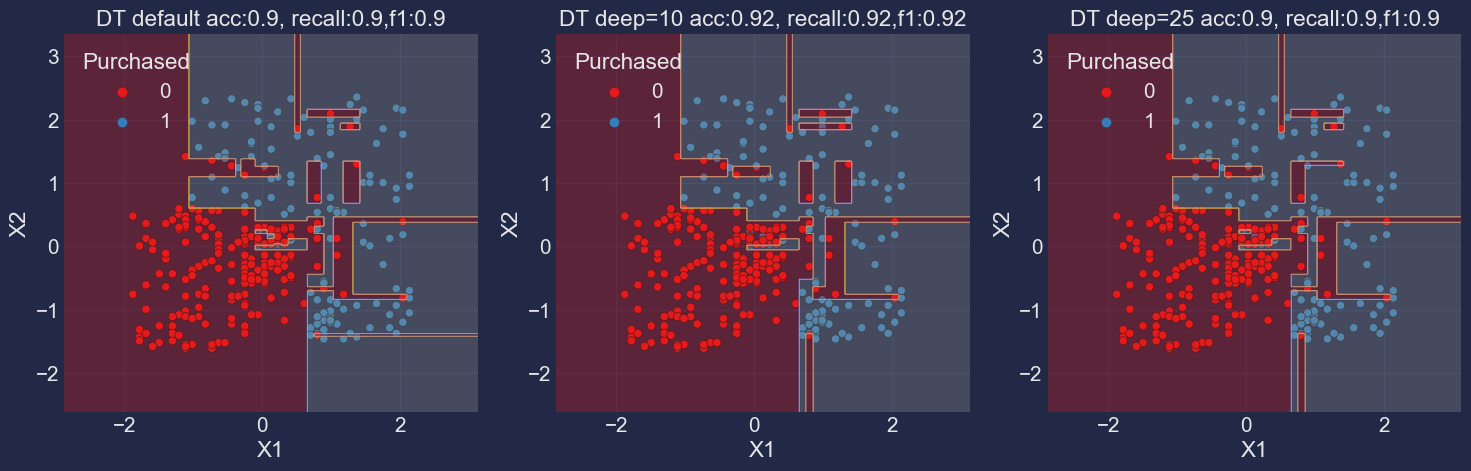

In [43]:
# Generar datos de ejemplo
X = X_train[:,:2]  # we only take the first two features.
y = y_train

# Crear una instancia del modelo SVM con diferentes parámetros
model1 = DecisionTreeClassifier(random_state=0)
model2 = DecisionTreeClassifier(criterion="gini",max_depth=10 ,random_state=0)
model3 = DecisionTreeClassifier(criterion="gini",max_depth=12 ,random_state=0)

# Entrenar los modelos
model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)

# Predict
y1=model1.predict(X_test[:,:2])
y2=model2.predict(X_test[:,:2])
y3=model3.predict(X_test[:,:2])
# evaluation
accuracy_m1, recall_m1, f1_m1 = evaluar_modelo(y_test,y1)
accuracy_m2, recall_m2, f1_m2 = evaluar_modelo(y_test,y2)
accuracy_m3, recall_m3, f1_m3 = evaluar_modelo(y_test,y3)

# Crear una malla de puntos para la visualización
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Realizar predicciones en la malla de puntos para cada modelo
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

Z3 = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.style.use("https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle")
# Graficar los resultados utilizando seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', ax=axes[0],edgecolor='k')
axes[0].contourf(xx, yy, Z1, alpha=0.3, cmap='Set1')
axes[0].set_title(f'DT default acc:{round(accuracy_m1,2)}, recall:{round(recall_m1,2)},f1:{round(f1_m1,2)}')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', ax=axes[1],edgecolor='k')
axes[1].contourf(xx, yy, Z2, alpha=0.3, cmap='Set1')
axes[1].set_title(f'DT deep=10 acc:{round(accuracy_m2,2)}, recall:{round(recall_m2,2)},f1:{round(f1_m2,2)}')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', ax=axes[2],edgecolor='k')
axes[2].contourf(xx, yy, Z3, alpha=0.3, cmap='Set1')
axes[2].set_title(f'DT deep=25 acc:{round(accuracy_m3,2)}, recall:{round(recall_m3,2)},f1:{round(f1_m3,2)}')

# Ajustar los límites de los ejes
for ax in axes:
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

# Mostrar la figura
plt.tight_layout()
plt.show()
